In [3]:
import pandas as pd
import numpy as np


excel_file_path = 'gunrightsdonations.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Get unique nodes from both source and destination columns
all_nodes = np.unique(df[['committee_name', 'contributor_name']].values)

# Create an empty adjacency matrix filled with zeros
adjacency_matrix = pd.DataFrame(0, index=all_nodes, columns=all_nodes, dtype=int)

# Populate the adjacency matrix with weights
for index, row in df.iterrows():
    source_node = row['contributor_name']
    destination_node = row['committee_name']
    weight = row['contributor_aggregate_ytd']

    # Update the corresponding cell in the adjacency matrix
    adjacency_matrix.at[source_node, destination_node] = weight

# Display or save the adjacency matrix
print(adjacency_matrix)

# Save the new adjacency matrix to a new Excel file
adjacency_matrix.to_excel('corrected_output_matrix.xlsx', index=True)


                               ADRIAN SMITH FOR CONGRESS  \
ADRIAN SMITH FOR CONGRESS                              0   
ALASKANS FOR DON YOUNG                                 0   
ALEX MOONEY FOR CONGRESS                               0   
AMODEI FOR NEVADA                                      0   
ANDREW GRANT FOR CONGRESS                              0   
...                                                  ...   
WOMACK FOR CONGRESS COMMITTEE                          0   
YOUNG FOR IOWA, INC.                                   0   
YOUNG KIM FOR CONGRESS                                 0   
YVETTE4CONGRESS                                        0   
ZELDIN FOR CONGRESS                                    0   

                               ALASKANS FOR DON YOUNG  \
ADRIAN SMITH FOR CONGRESS                           0   
ALASKANS FOR DON YOUNG                              0   
ALEX MOONEY FOR CONGRESS                            0   
AMODEI FOR NEVADA                                  

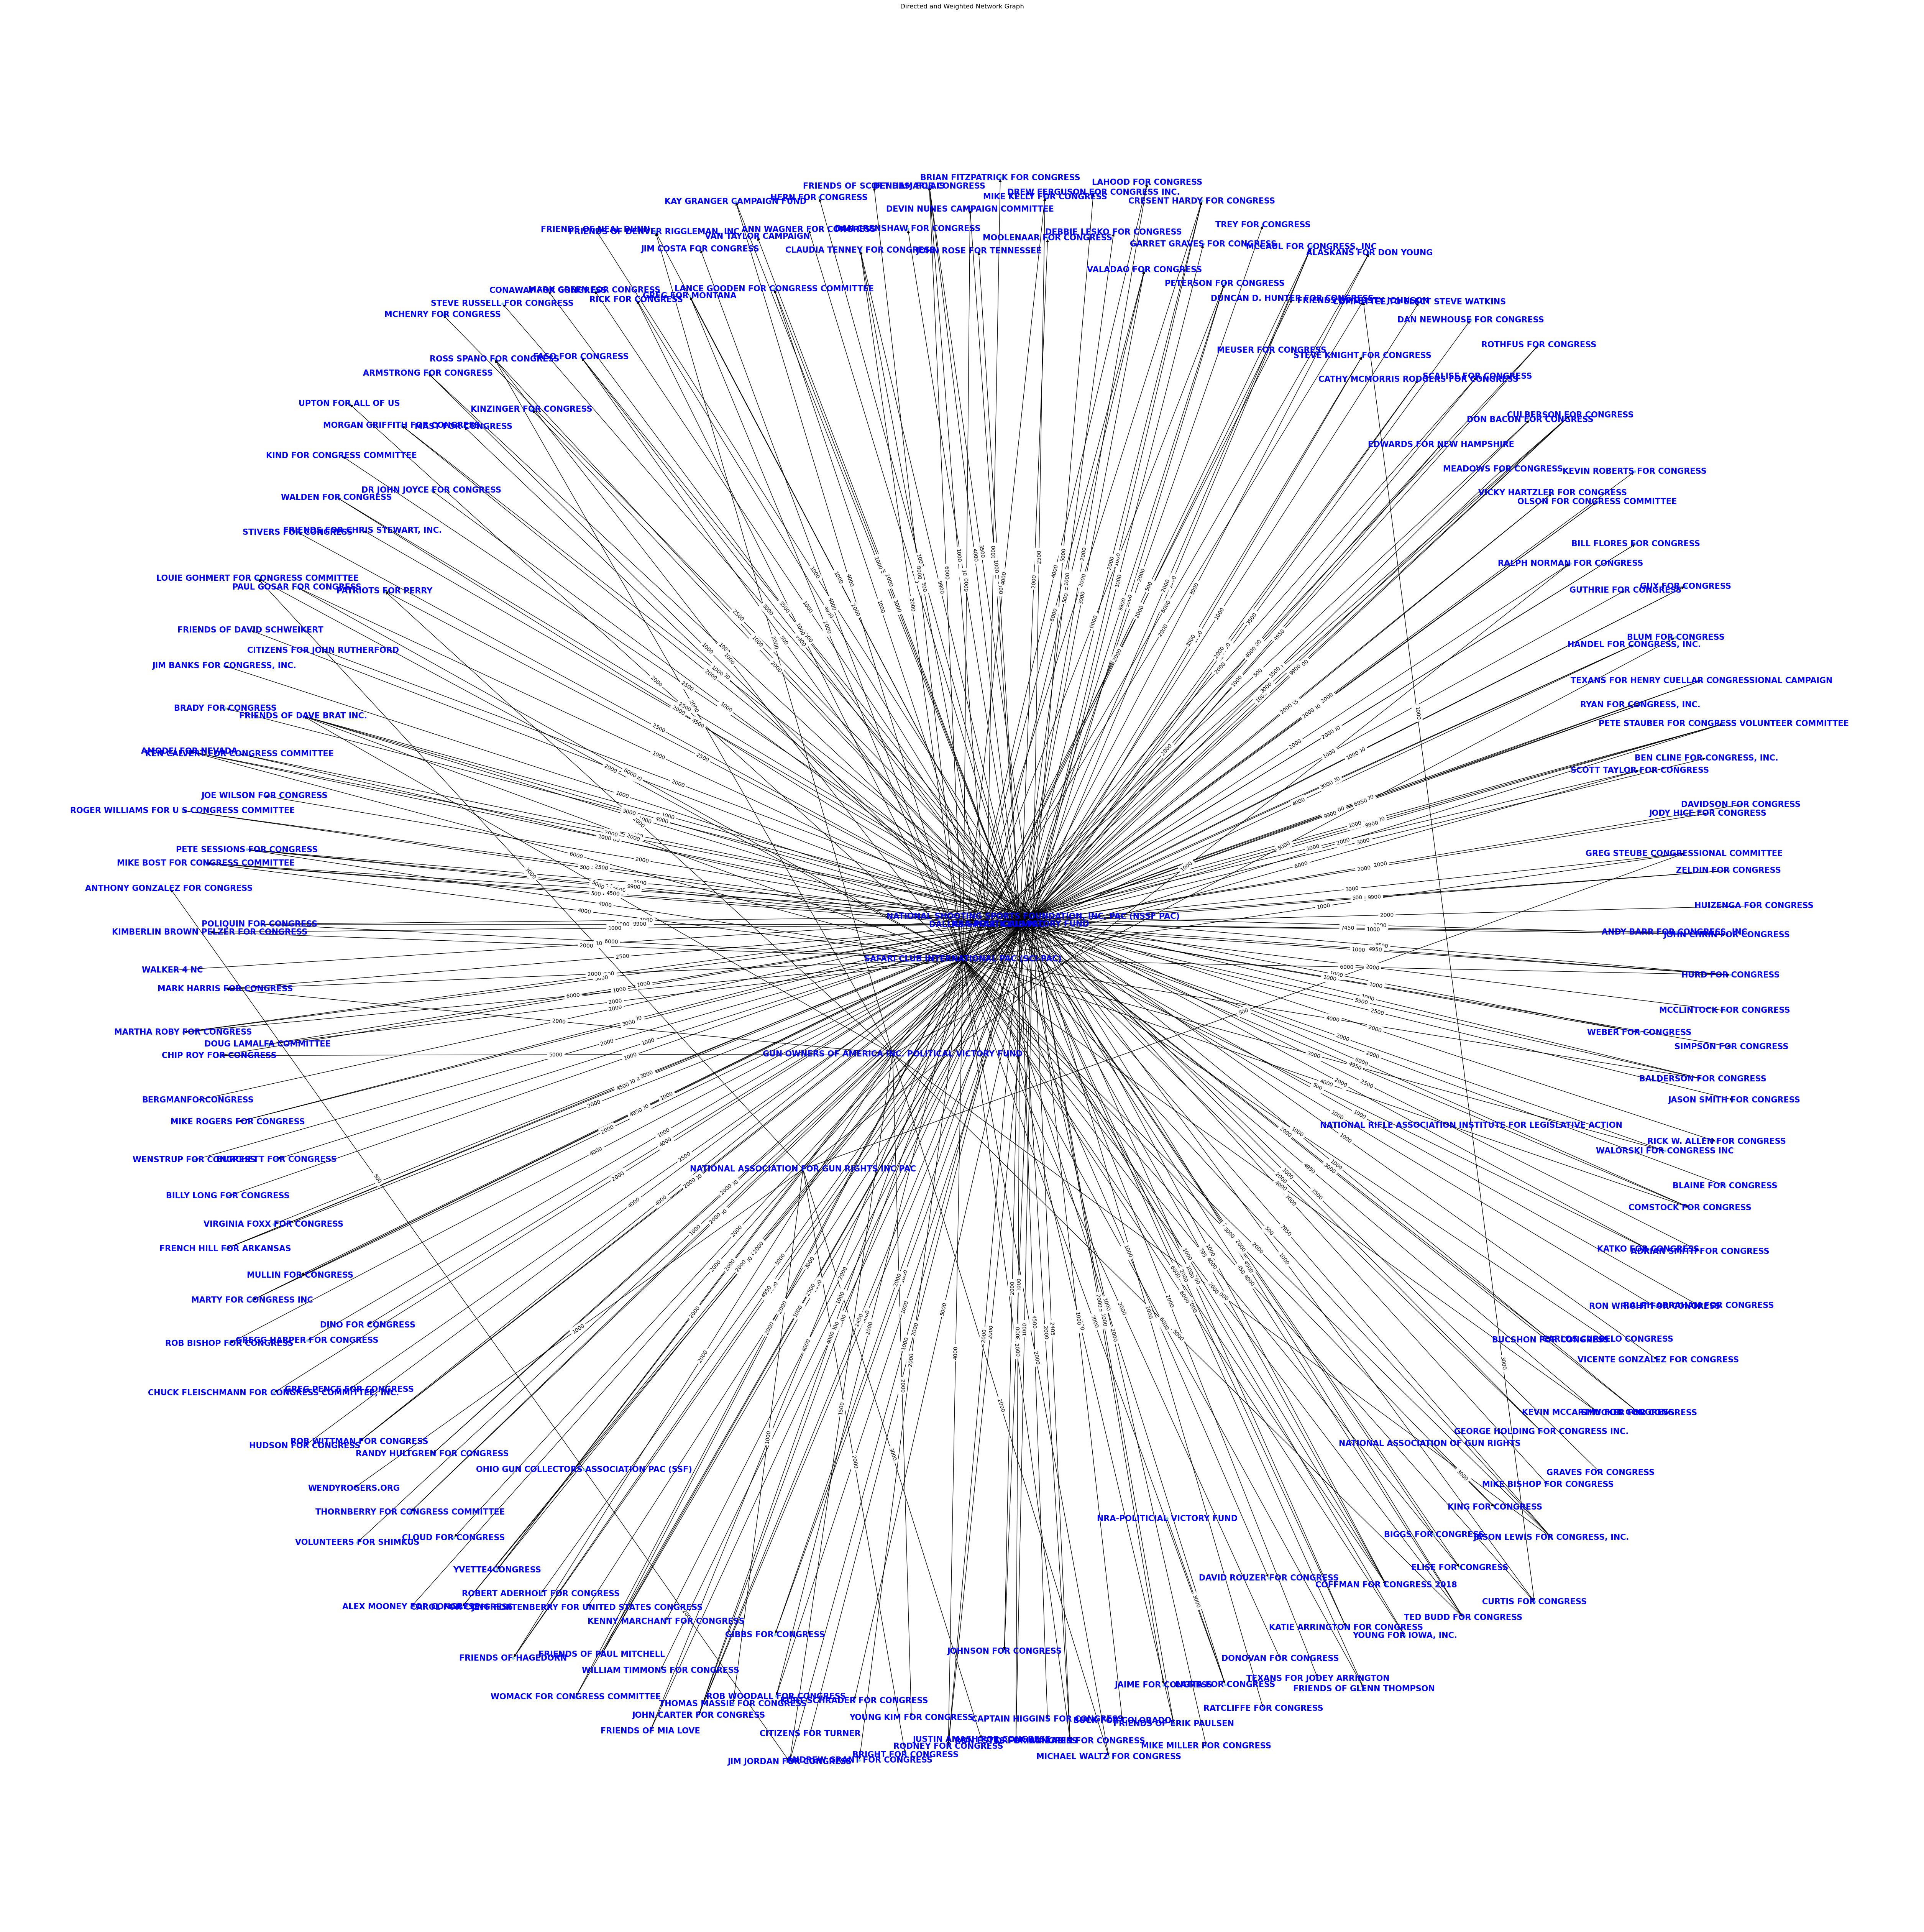

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the adjacency matrix from the Excel file
excel_file_path = 'corrected_output_matrix.xlsx'
adjacency_matrix_df = pd.read_excel(excel_file_path, index_col=0)

# Step 2: Create a directed graph from the adjacency matrix
G = nx.from_pandas_adjacency(adjacency_matrix_df, create_using=nx.DiGraph)

# Step 3: Draw the graph with weights
pos = nx.spring_layout(G)  # You can use other layout algorithms as well

edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}

# Adjust the figure size
plt.figure(figsize=(50, 50))

nx.draw(G, pos, with_labels=True, node_size=15, node_color='skyblue', font_size=15, font_color='blue', font_weight='bold', arrowsize=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Directed and Weighted Network Graph')
plt.show()


In [21]:
import pandas as pd
import networkx as nx

# Step 1: Read the adjacency matrix from the Excel file
excel_file_path = 'corrected_output_matrix.xlsx'
adjacency_matrix_df = pd.read_excel(excel_file_path, index_col=0)

# Step 2: Create a directed graph from the adjacency matrix
G = nx.from_pandas_adjacency(adjacency_matrix_df, create_using=nx.DiGraph)

# Step 3: Find nodes with the highest weighted incoming edges
in_degree_weights = {node: sum(weight['weight'] for _, _, weight in G.in_edges(node, data=True)) for node in G.nodes()}
max_weighted_nodes = [node for node, weight in sorted(in_degree_weights.items(), key=lambda x: x[1], reverse=True)[:20]]

# Display the nodes with the highest weighted incoming edges
table_data = {'Node': max_weighted_nodes, 'Total Incoming Weight': [in_degree_weights[node] for node in max_weighted_nodes]}
max_weighted_table = pd.DataFrame(table_data)

print("Nodes with the highest weighted incoming edges:")
print(max_weighted_table)

# Optional: You can save this table to an Excel file if needed
max_weighted_table.to_excel('max_weighted_nodes_table.xlsx', index=False)


Nodes with the highest weighted incoming edges:
                                               Node  Total Incoming Weight
0                            CULBERSON FOR CONGRESS                  23900
1                             PETERSON FOR CONGRESS                  20900
2                           RYAN FOR CONGRESS, INC.                  19900
3                        PETE SESSIONS FOR CONGRESS                  19400
4                             POLIQUIN FOR CONGRESS                  17900
5                             TED BUDD FOR CONGRESS                  16000
6                         COFFMAN FOR CONGRESS 2018                  15950
7                                 HURD FOR CONGRESS                  15450
8                             COMSTOCK FOR CONGRESS                  14950
9                               DENHAM FOR CONGRESS                  14500
10                         MARTHA ROBY FOR CONGRESS                  14500
11                         JOHN CARTER FOR CONGRESS 

In [22]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import networkx as nx
from tabulate import tabulate

# Step 1: Read the adjacency matrix from the Excel file
excel_file_path = 'corrected_output_matrix.xlsx'
adjacency_matrix_df = pd.read_excel(excel_file_path, index_col=0)

# Step 2: Create a directed graph from the adjacency matrix
G = nx.from_pandas_adjacency(adjacency_matrix_df, create_using=nx.DiGraph)

# Step 3: Find nodes with the highest weighted incoming edges
in_degree_weights = {node: sum(weight['weight'] for _, _, weight in G.in_edges(node, data=True)) for node in G.nodes()}
max_weighted_nodes = [node for node, weight in sorted(in_degree_weights.items(), key=lambda x: x[1], reverse=True)[:10]]

# Display the nodes with the highest weighted incoming edges in a nice table format
table_data = [{'Node': node, 'Total Incoming Weight': in_degree_weights[node]} for node in max_weighted_nodes]
table_str = tabulate(table_data, headers='keys', tablefmt='pretty')

print("Nodes with the highest weighted incoming edges:")
print(table_str)


Nodes with the highest weighted incoming edges:
+----------------------------+-----------------------+
|            Node            | Total Incoming Weight |
+----------------------------+-----------------------+
|   CULBERSON FOR CONGRESS   |         23900         |
|   PETERSON FOR CONGRESS    |         20900         |
|  RYAN FOR CONGRESS, INC.   |         19900         |
| PETE SESSIONS FOR CONGRESS |         19400         |
|   POLIQUIN FOR CONGRESS    |         17900         |
|   TED BUDD FOR CONGRESS    |         16000         |
| COFFMAN FOR CONGRESS 2018  |         15950         |
|     HURD FOR CONGRESS      |         15450         |
|   COMSTOCK FOR CONGRESS    |         14950         |
|    DENHAM FOR CONGRESS     |         14500         |
+----------------------------+-----------------------+


In [7]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('nra-grades.csv')

# Filter rows based on conditions
filtered_df = df[(df['year'] == 2016) & (df['body_type'] == 'US House') & (df["race"] == "General")]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('2016nra.csv', index=False)

print("Filtered CSV file created successfully.")


Filtered CSV file created successfully.


In [10]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('NRA grades 2018 - Grades.csv')

# Filter rows based on conditions
filtered_df = df[(df['office'] == "US House")]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('2018nra.csv', index=False)

print("Filtered CSV file created successfully.")


Filtered CSV file created successfully.


In [14]:
import pandas as pd
# Load the first CSV file into a DataFrame with automatic delimiter detection
df1 = pd.read_csv('2016nra.csv', sep=None)

# Load the second CSV file into another DataFrame with automatic delimiter detection
df2 = pd.read_csv('2018nra.csv', sep=None)
# Merge DataFrames based on the "full_name" column
merged_df = pd.merge(df1, df2, on='full_name', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('16-18nra.csv', index=False)

print("Merged CSV file created successfully.")


Merged CSV file created successfully.


/var/folders/7q/mml21svx7kb164gkw0xqzctm0000gn/T/ipykernel_70950/1620766089.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv('2016nra.csv', sep=None)
/var/folders/7q/mml21svx7kb164gkw0xqzctm0000gn/T/ipykernel_70950/1620766089.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('2018nra.csv', sep=None)


In [19]:
import pandas as pd

# Load the CSV file into a DataFrame with the correct delimiter
df = pd.read_csv('16-18nraformatted.csv', delimiter=';')

# Check the column names in your DataFrame
print(df.columns)

# Assuming your columns are named 'grade2018' and 'grade2016'
df['grade_difference'] = df['grade2018'] - df['grade2016']

# Calculate the average difference
average_difference = df['grade_difference'].mean()

print(f"Average difference between grade2018 and grade2016: {average_difference}")



Index(['state_x', 'district_x', 'year_x', 'full_name', 'party_x', 'grade2016',
       'year_y', 'grade2018'],
      dtype='object')
Average difference between grade2018 and grade2016: -0.07605633802816901


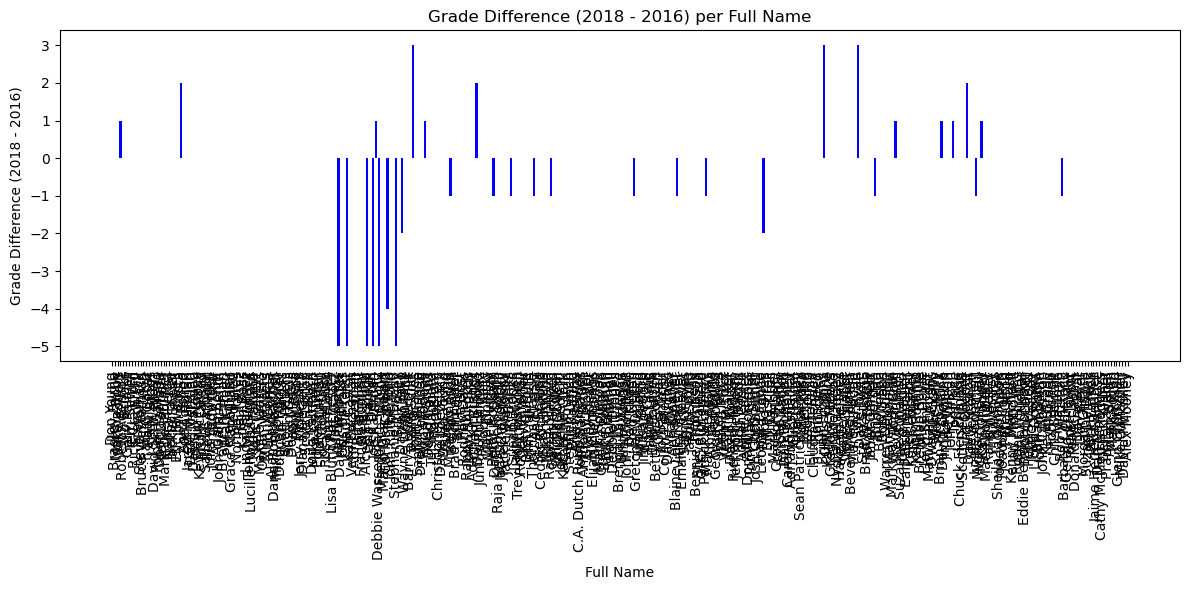

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame with the correct delimiter
df = pd.read_csv('16-18nraformatted.csv', delimiter=';')

# Calculate the difference between "grade2018" and "grade2016" for each row
df['grade_difference'] = df['grade2018'] - df['grade2016']

# Create a bar graph with "full_name" as the x-axis and "grade_difference" as the y-axis
plt.figure(figsize=(12, 6))
plt.bar(df['full_name'], df['grade_difference'], color='blue')
plt.xlabel('Full Name')
plt.ylabel('Grade Difference (2018 - 2016)')
plt.title('Grade Difference (2018 - 2016) per Full Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/var/folders/7q/mml21svx7kb164gkw0xqzctm0000gn/T/ipykernel_70950/1940145344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['grade_difference'] = filtered_df['grade2018'] - filtered_df['grade2016']


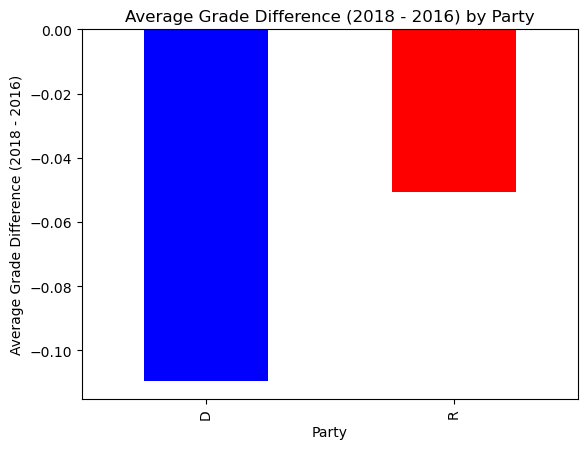

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame with the correct delimiter
df = pd.read_csv('16-18nraformatted.csv', delimiter=';')

# Filter rows with "D" or "R" in the "party_x" column
filtered_df = df[df['party_x'].isin(['D', 'R'])]

# Calculate the difference between "grade2018" and "grade2016" for each row
filtered_df['grade_difference'] = filtered_df['grade2018'] - filtered_df['grade2016']

# Calculate the average grade difference for each party
average_by_party = filtered_df.groupby('party_x')['grade_difference'].mean()

# Create a bar graph with party on the x-axis and average grade difference on the y-axis
average_by_party.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Party')
plt.ylabel('Average Grade Difference (2018 - 2016)')
plt.title('Average Grade Difference (2018 - 2016) by Party')
plt.show()


In [22]:
import pandas as pd
import networkx as nx

# Step 1: Read the adjacency matrix from the Excel file
excel_file_path = 'corrected_output_matrix.xlsx'
adjacency_matrix_df = pd.read_excel(excel_file_path, index_col=0)

# Step 2: Create a directed graph from the adjacency matrix
G = nx.from_pandas_adjacency(adjacency_matrix_df, create_using=nx.DiGraph)

# Step 3: Find nodes with the highest weighted incoming edges
in_degree_weights = {node: sum(weight['weight'] for _, _, weight in G.in_edges(node, data=True)) for node in G.nodes()}

# Create a DataFrame with nodes and their total incoming weights
result_df = pd.DataFrame(list(in_degree_weights.items()), columns=['Node', 'Total Incoming Weight'])

# Save the DataFrame to a CSV file
result_df.to_csv('total_incoming_weights.csv', index=False)

print("Total incoming weights saved to 'total_incoming_weights.csv'")


Total incoming weights saved to 'total_incoming_weights.csv'


Column names in nra_formatted_df: Index(['state_x;district_x;year_x;full_name;party_x;grade2016;year_y;grade2018'], dtype='object')


KeyError: 'full_name'

Column names in nra_formatted_df: Index(['state_x;district_x;year_x;full_name;party_x;grade2016;year_y;grade2018',
       'state_x', 'district_x', 'year_x', 'full_name', 'party_x', 'grade2016',
       'year_y', 'grade2018'],
      dtype='object')
Info for nra_formatted_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   state_x;district_x;year_x;full_name;party_x;grade2016;year_y;grade2018  355 non-null    object
 1   state_x                                                                 355 non-null    object
 2   district_x                                                              355 non-null    object
 3   year_x                                                                  355 non-null    object
 4   full_name        

KeyError: 'full_name'

Column names in nra_formatted_df: Index(['state_x;district_x;year_x;full_name;party_x;grade2016;year_y;grade2018',
       'state_x', 'district_x', 'year_x', 'full_name', 'party_x', 'grade2016',
       'year_y', 'grade2018'],
      dtype='object')
Info for nra_formatted_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   state_x;district_x;year_x;full_name;party_x;grade2016;year_y;grade2018  355 non-null    object
 1   state_x                                                                 355 non-null    object
 2   district_x                                                              355 non-null    object
 3   year_x                                                                  355 non-null    object
 4   full_name        

KeyError: 'full_name'

In [67]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV files with the correct delimiter
incoming_weights_df = pd.read_csv('total_incoming_weights_edited.csv', delimiter=';')
nra_formatted_df = pd.read_csv('16-18nraformatted.csv', delimiter=';')

# Check column names and information for nra_formatted_df
print("Column names in nra_formatted_df:", nra_formatted_df.columns)
print("Info for nra_formatted_df:")
print(nra_formatted_df.info())

# Merge the two DataFrames based on a common identifier
common_identifier = 'full_name'
merged_df = pd.merge(nra_formatted_df, incoming_weights_df, left_on=common_identifier, right_on=common_identifier, how='left', suffixes=('', '_incoming'))

# Fill missing values in the 'Total Incoming Weight' column with zero
merged_df['Total Incoming Weight'].fillna(0, inplace=True)

# Display a few rows of the merged DataFrame for inspection
print("Merged DataFrame:")
print(merged_df.head())

# Define independent (X) and dependent (y) variables
X = merged_df['Total Incoming Weight']
y = merged_df['grade2018'] - merged_df['grade2016']

merged_df['grade_difference'] = merged_df['grade2018'] - merged_df['grade2016']


# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Display regression results
print(results.summary())

# Access the coefficients
beta_0 = results.params['const']
beta_1 = results.params['Total Incoming Weight']

# Display the interpreted coefficients
print(f'Intercept (beta_0): {beta_0:.4f}')
print(f'Coefficient for Total Incoming Weight (beta_1): {beta_1:.4f}')


Column names in nra_formatted_df: Index(['state_x', 'district_x', 'year_x', 'full_name', 'party_x', 'grade2016',
       'year_y', 'grade2018'],
      dtype='object')
Info for nra_formatted_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state_x     355 non-null    object
 1   district_x  355 non-null    object
 2   year_x      355 non-null    int64 
 3   full_name   355 non-null    object
 4   party_x     355 non-null    object
 5   grade2016   355 non-null    int64 
 6   year_y      355 non-null    int64 
 7   grade2018   355 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 22.3+ KB
None
Merged DataFrame:
  state_x  district_x  year_x        full_name party_x  grade2016  year_y  \
0      AK    At Large    2016        Don Young       R          7    2018   
1      AL  District 1    2016    Bradley Byrne       R          6    2018  

In [68]:
import statsmodels.api as sm

# Assuming 'Total Incoming Weight' is the independent variable and 'Grade Difference' is the dependent variable
X = merged_df['Total Incoming Weight']
y = merged_df['grade_difference']

# Add a constant term to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:       grade_difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5634
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.453
Time:                        05:31:30   Log-Likelihood:                -425.58
No. Observations:                 355   AIC:                             855.2
Df Residuals:                     353   BIC:                             862.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [58]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV files with the correct delimiter
incoming_weights_df = pd.read_csv('total_incoming_weights_edited.csv', delimiter=';')
nra_formatted_df = pd.read_csv('16-18nraformatted.csv', delimiter=';')

# Check column names and information for nra_formatted_df
print("Column names in nra_formatted_df:", nra_formatted_df.columns)
print("Info for nra_formatted_df:")
print(nra_formatted_df.info())

# Merge the two DataFrames based on a common identifier
common_identifier = 'full_name'
merged_df = pd.merge(nra_formatted_df, incoming_weights_df, left_on=common_identifier, right_on=common_identifier, how='left', suffixes=('', '_incoming'))

# Fill missing values in the 'Total Incoming Weight' column with zero
merged_df['Total Incoming Weight'].fillna(0, inplace=True)

# Display a few rows of the merged DataFrame for inspection
print("Merged DataFrame:")
print(merged_df.head())

# Define independent (X) and dependent (y) variables
X = merged_df['Total Incoming Weight']
y = merged_df['grade2016']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Display regression results
print(results.summary())


Column names in nra_formatted_df: Index(['state_x', 'district_x', 'year_x', 'full_name', 'party_x', 'grade2016',
       'year_y', 'grade2018'],
      dtype='object')
Info for nra_formatted_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state_x     355 non-null    object
 1   district_x  355 non-null    object
 2   year_x      355 non-null    int64 
 3   full_name   355 non-null    object
 4   party_x     355 non-null    object
 5   grade2016   355 non-null    int64 
 6   year_y      355 non-null    int64 
 7   grade2018   355 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 22.3+ KB
None
Merged DataFrame:
  state_x  district_x  year_x        full_name party_x  grade2016  year_y  \
0      AK    At Large    2016        Don Young       R          7    2018   
1      AL  District 1    2016    Bradley Byrne       R          6    2018  

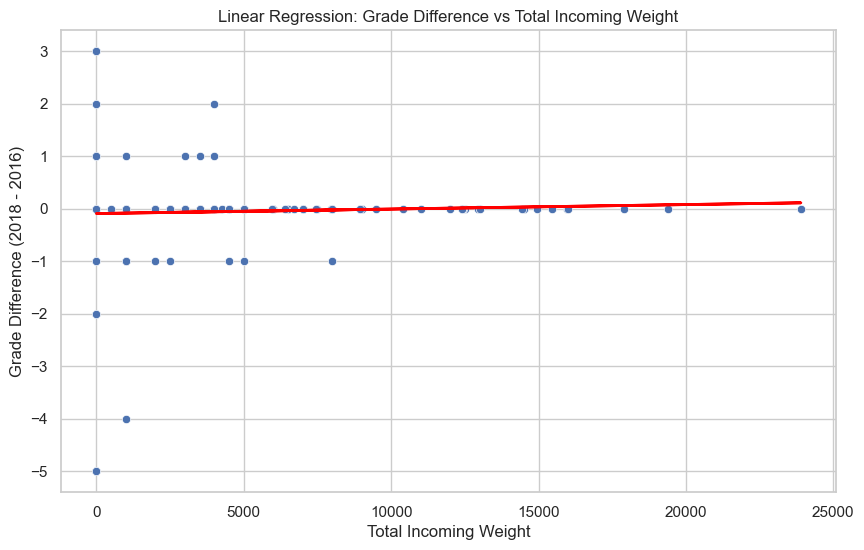

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns  
# Set seaborn style (optional)
sns.set(style="whitegrid")

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Incoming Weight', y='grade_difference', data=merged_df)

# Plot the regression line
plt.plot(merged_df['Total Incoming Weight'], results.fittedvalues, color='red', linewidth=2)

# Set labels and title
plt.xlabel('Total Incoming Weight')
plt.ylabel('Grade Difference (2018 - 2016)')
plt.title('Linear Regression: Grade Difference vs Total Incoming Weight')

# Show the plot
plt.show()

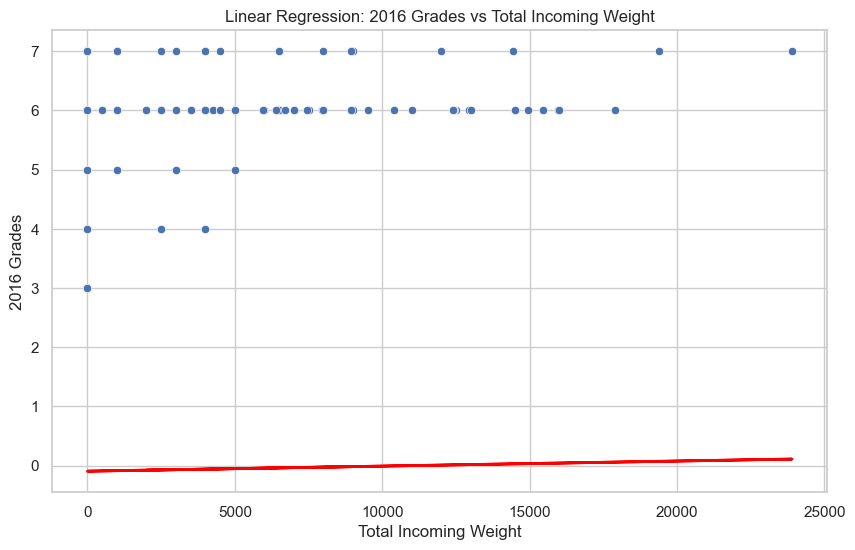

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns  
# Set seaborn style (optional)
sns.set(style="whitegrid")

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Incoming Weight', y='grade2016', data=merged_df)

# Plot the regression line
plt.plot(merged_df['Total Incoming Weight'], results.fittedvalues, color='red', linewidth=2)

# Set labels and title
plt.xlabel('Total Incoming Weight')
plt.ylabel('2016 Grades')
plt.title('Linear Regression: 2016 Grades vs Total Incoming Weight')

# Show the plot
plt.show()